In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
x0 = 1 # prey
y0 = 0.5 # predator
T = 300 # days

In [36]:
a = 0.1
alpha = 0.1
c = 0.125
gamma = 0.1

In [37]:
def f(x, y):
    return a*x - alpha*x*y

def g(x, y):
    return -c*y + gamma*x*y

In [38]:
dt = 1
t = np.linspace(0, T, int(T/dt) + 1)

In [39]:
# Estimate by Runge-Kutta Method
x_rk = np.zeros(len(t))
x_rk[0] = x0

y_rk = np.zeros(len(t))
y_rk[0] = y0

for i in range(1, len(t)):    
    xk1 = f(x_rk[i-1], y_rk[i-1])
    yk1 = g(x_rk[i-1], y_rk[i-1])
    xk2 = f(x_rk[i-1] + xk1 * dt/2, y_rk[i-1] + yk1 * dt/2)
    yk2 = g(x_rk[i-1] + xk1 * dt/2, y_rk[i-1] + yk1 * dt/2)
    xk3 = f(x_rk[i-1] + xk2 * dt/2, y_rk[i-1] + yk2 * dt/2)
    yk3 = g(x_rk[i-1] + xk2 * dt/2, y_rk[i-1] + yk2 * dt/2)
    xk4 = f(x_rk[i-1] + xk3 * dt, y_rk[i-1] + yk3 * dt)
    yk4 = g(x_rk[i-1] + xk3 * dt, y_rk[i-1] + yk3 * dt)

    x_rk[i] = x_rk[i-1] + (1/6) * dt * (xk1 + 2*xk2 + 2*xk3 + xk4)
    y_rk[i] = y_rk[i-1] + (1/6) * dt * (yk1 + 2*yk2 + 2*yk3 + yk4)

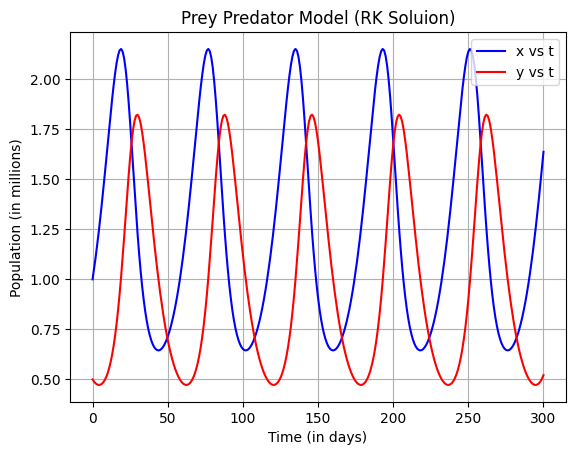

In [40]:
plt.plot(t, x_rk, label='x vs t', color='blue')
plt.plot(t, y_rk, label='y vs t', color='red')
plt.xlabel('Time (in days)')
plt.ylabel('Population (in millions)')
plt.title('Prey Predator Model (RK Soluion)')
plt.legend()
plt.grid()

plt.show()